<a href="https://colab.research.google.com/github/wahyunh10/Data-Exploration-Ford-GoBike-Project/blob/main/Data_Exploration_Ford_GoBike_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration Ford GoBike Project**

# **Table of Contents**
---
* Preliminary Wrangling
1. Data Gathering & Assessing
2. Data Cleaning


* Data Exploration
1. Univariate Exploration
2. Bivariate Exploration
3. Multivariate Exploration





# **Preliminary Wrangling**

Ford GoBike System Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the year 2017.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import datetime
import os

sb.set_style('darkgrid')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input/2017-ford-gobike-ridedata/2017_ford_go_bike_tripdata.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Data Gathering & Assessing**

I have chose 2017 Ford GoBike System Dataset which consists of six months bike rides data(Jun-Dec).

In [2]:
# Read data from csv file and Load it into dataframe    
ford_df = pd.read_csv('2017-fordgobike-tripdata.csv')
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
# high-level overview of data shape and composition
ford_df.shape

(519700, 15)

In [4]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [5]:
#check for duplicated values
ford_df.duplicated().sum()

0

In [6]:
#check for null values
ford_df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

**Observations:**

* Missing values in the dataset
* Erreneous data types:
 start_time and end_time types are object instead of datetime type

  - member_birth_year should be type of int
  - start_station_id, end_station_id, and bike_id can be str type
  - user_type and member_gender can be type of category
* Unwanted columns

# **Data Cleaning**

In [7]:
# Before cleaning, make copy of original datasets
ford_clean = ford_df.copy()

**Issue 1: Missing values in the dataset**

**Define** Drop the null values from the dataset

In [8]:
#drop the null values from dataset
ford_clean.dropna(how = 'any', axis = 0, inplace=True)

**Test**

In [9]:
# check whether null values are dropped
ford_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

**Issue 2: Erreneous data types**

**Define** 

* convert start_time and end_time types from object to datetime
* convert member_birth_year type from float to int
* convert start_station_id, end_station_id, and bike_id to str type
* convert user_type and member_gender to type of category

In [10]:
# convert the data type of start_time and end_time to datetime.
ford_clean.start_time = pd.to_datetime(ford_clean.start_time)
ford_clean.end_time = pd.to_datetime(ford_clean.end_time)

# convert member_birth_year from float64 to int
ford_clean.member_birth_year = ford_clean.member_birth_year.astype(int)

# convert ids from object to str
ford_clean.start_station_id = ford_clean.start_station_id.astype(str)
ford_clean.end_station_id = ford_clean.end_station_id.astype(str)
ford_clean.bike_id = ford_clean.bike_id.astype(str)


# convert user_type and member_gender datatype into category
ford_clean.user_type = ford_clean.user_type.astype('category')
ford_clean.member_gender = ford_clean.member_gender.astype('category')

**Test**

In [11]:
# check whether data type are converted correctly
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             453159 non-null  int64         
 1   start_time               453159 non-null  datetime64[ns]
 2   end_time                 453159 non-null  datetime64[ns]
 3   start_station_id         453159 non-null  object        
 4   start_station_name       453159 non-null  object        
 5   start_station_latitude   453159 non-null  float64       
 6   start_station_longitude  453159 non-null  float64       
 7   end_station_id           453159 non-null  object        
 8   end_station_name         453159 non-null  object        
 9   end_station_latitude     453159 non-null  float64       
 10  end_station_longitude    453159 non-null  float64       
 11  bike_id                  453159 non-null  object        
 12  user_type       

**Issue 3: Unwanted Columns**

**Define** Drop the unused columns using dropna() method

In [12]:
# drop the unused columns
ford_clean.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1 , inplace = True)

**Test**

In [13]:
# check whether columns are dropped
ford_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender'],
      dtype='object')

**Feature Engineering**

To make the analysis easy, lets fetch time of day, day of the week, or month of the year from start_time




In [14]:
# use strftime() method to scrap the time data
ford_clean['start_day'] = ford_clean['start_time'].apply(lambda x: x.strftime('%A')).astype('category')
ford_clean['start_month'] = ford_clean['start_time'].apply(lambda x: x.strftime('%b')).astype('category')
ford_clean['start_hour'] = ford_clean['start_time'].apply(lambda x: x.strftime('%H')).astype(int)

# Lets calcluate the member age from the birthyear
ford_clean['member_age'] = 2017 - ford_clean['member_birth_year']

In [15]:
# Brief summary of cleaned DataFrame
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        453159 non-null  int64         
 1   start_time          453159 non-null  datetime64[ns]
 2   end_time            453159 non-null  datetime64[ns]
 3   start_station_id    453159 non-null  object        
 4   start_station_name  453159 non-null  object        
 5   end_station_id      453159 non-null  object        
 6   end_station_name    453159 non-null  object        
 7   bike_id             453159 non-null  object        
 8   user_type           453159 non-null  category      
 9   member_birth_year   453159 non-null  int64         
 10  member_gender       453159 non-null  category      
 11  start_day           453159 non-null  category      
 12  start_month         453159 non-null  category      
 13  start_hour          453159 no

**Storing cleaned Dataset :**

In [16]:
ford_clean.to_csv('cleaned-fordgobike-tripdata-2017.csv', encoding='utf-8', index=False)

In [17]:
# Read data from csv file and Load it into dataframe
df = pd.read_csv('cleaned-fordgobike-tripdata-2017.csv')
df.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_day,start_month,start_hour,member_age
207280,456,2017-10-18 11:02:20.988,2017-10-18 11:09:57.250,287,Almaden Blvd at Balbach St,312,San Jose Diridon Station,1093,Subscriber,1993,Male,Wednesday,Oct,11,24
189040,1148,2017-10-24 14:44:26.588,2017-10-24 15:03:35.240,14,Clay St at Battery St,115,Jackson Playground,2828,Subscriber,1986,Male,Tuesday,Oct,14,31


# **Data Exploration**

**What is the structure of your dataset?**



> The dataset consists of 453159 bike ride entries and 15 features

**What is/are the main feature(s) of interest in your dataset?**



> * Most interested features in this dataset are bike ride start_time (in terms of month of the year, day of the week, or hour of the day) and ride duration. Does it depends on characteristics of the riders?



**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**



> I expect time_characteristics and duration_sec highly depends on below characteristics of the riders,

* *user_type*
* *member_gender*
* *member_age*



# **Univariate Exploration**

In [18]:
# set the default color
default_color = sb.color_palette()[0]

**Distribution of Day, Month and Hour of start time**

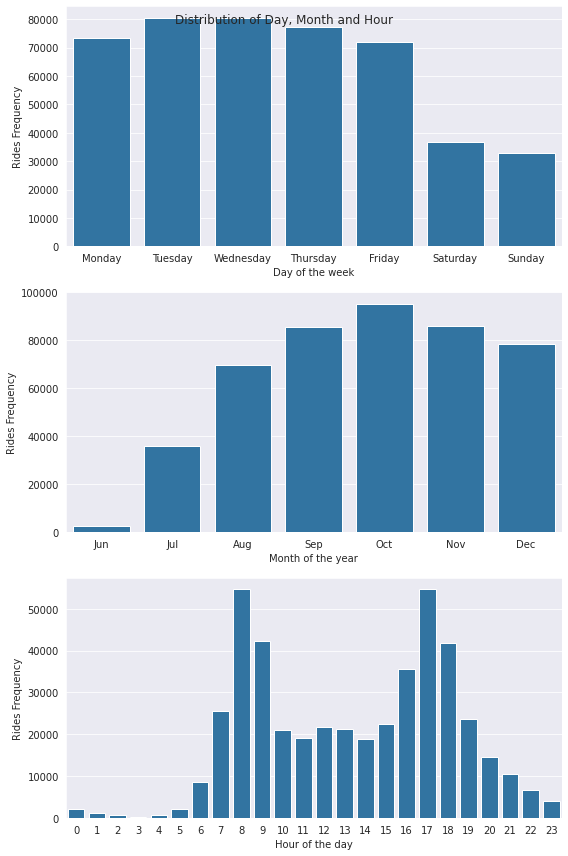

In [19]:
# set subplots
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

# time characteristic order
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hour_order = np.arange(0,24)

# plot the Day, Month and Hour
sb.countplot(data = df, x = 'start_day', color = default_color, ax = ax[0], order = day_order, label = 'data')
sb.countplot(data = df, x = 'start_month', color = default_color, ax = ax[1], order = month_order)
sb.countplot(data = df, x = 'start_hour', color = default_color, ax = ax[2], order = hour_order);

# title and labels
fig.suptitle('Distribution of Day, Month and Hour');

for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[1].set_xlabel('Month of the year')
ax[2].set_xlabel('Hour of the day')

fig.tight_layout();

* **Weekdays has higher** ride counts rather **than weekend**. Especially ride count for mid three days of the week (Tue, Wed, Thurs) ranges between 75k and 80k. It makes sense that because of the working schedule.
* More number of rides commuted in **October** month. **July **ride counts are very low, it might because of the launch of the program.
* Peak hours are **8-9 AM** and **4-6 PM**. This is the common commuting time.

**Distribution of user_type and member_gender**

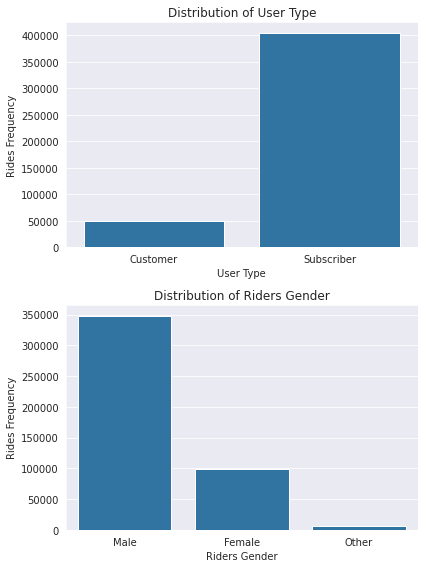

In [20]:
fig, ax = plt.subplots(nrows=2, figsize = [6,8])

sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[1]);

# title and labels
for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('User Type')
ax[0].set_title('Distribution of User Type')
ax[1].set_xlabel('Riders Gender')
ax[1].set_title('Distribution of Riders Gender')
fig.tight_layout();

* **Subcribers** have done more number of rides rather than **Customers**. As subscribed member ride price is less than casual customers, this might be the reason for more number of rides. Refer Bay_Wheels_wikipedia.
* **Male riders** counts are three times more than the **Female riders**. Other gender type is verly less when compared to other genders

**Distribution of Ride duration**

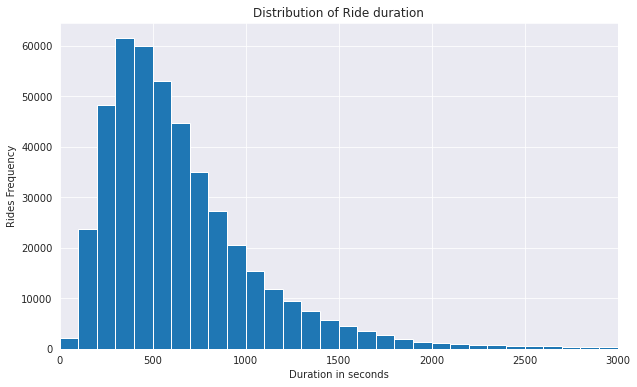

In [21]:
plt.figure(figsize=(10,6))

# set bins
bins = np.arange(0, df.duration_sec.max()+100, 100)

# plot the distribution
plt.hist(data = df, x = 'duration_sec', bins = bins)

# set limits to make the appropriate plot
plt.xlim(0,3000);

# title and labels
plt.title('Distribution of Ride duration')
plt.xlabel('Duration in seconds')
plt.ylabel('Rides Frequency');

* Distribution of ride duration has long tail and right skewed. Let's do the scale tranformation.

In [22]:
# Log tranformation description of ride duartion
np.log10(df.duration_sec.describe())

count    5.656251
mean     2.920611
std      3.402310
min      1.785330
25%      2.561101
50%      2.745075
75%      2.923244
max      4.935769
Name: duration_sec, dtype: float64

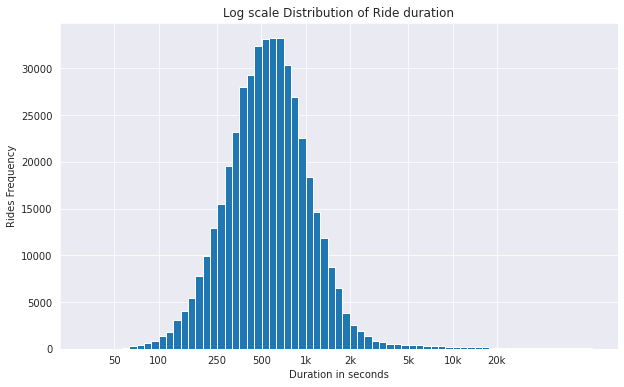

In [23]:
# set bins
bins = 10 ** np.arange(1.5, np.log10(df.duration_sec.max())+0.05, 0.05)

# plot the distribution
plt.figure(figsize=(10,6))
plt.hist(data = df, x = 'duration_sec', bins = bins)

# log scale transformation
plt.xscale('log')

# set title, lbels and ticks
plt.xticks([50,100,250,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,250,500, '1k', '2k', '5k', '10k', '20k'])
plt.title('Log scale Distribution of Ride duration')
plt.xlabel('Duration in seconds')
plt.ylabel('Rides Frequency');

* After log scale tranformation, distribution of ride duration **looks unimodal and normally distributed**. Peak trip duration falls in **the range 300 - 1000 seconds**.


**Distribution of Riders Age**

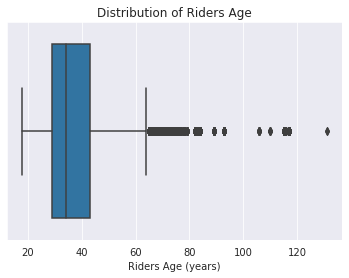

In [24]:
# plot the distribution
sb.boxplot(data = df, x='member_age')

# set title
plt.title('Distribution of Riders Age')
plt.xlabel('Riders Age (years)');

In [25]:
df.member_birth_year.describe()

count    453159.000000
mean       1980.404787
std          10.513488
min        1886.000000
25%        1974.000000
50%        1983.000000
75%        1988.000000
max        1999.000000
Name: member_birth_year, dtype: float64

* We could see that age has more number of outliers as ages are greater than 100 which is exceptional where the bike riders birth year below 1917. So, Let's consider members whose **age is below 60**

In [26]:
# Remove the outliers where age greater than 60
df = df[df.member_age <= 60]

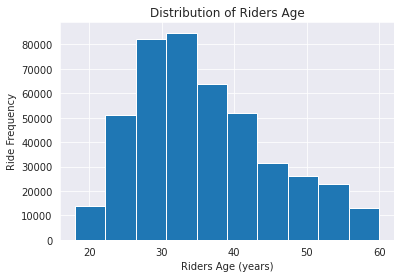

In [27]:
# plot the distribution
plt.hist(data = df, x = 'member_age')

# set title
plt.title('Distribution of Riders Age')
plt.xlabel('Riders Age (years)')
plt.ylabel('Ride Frequency');

* Most of riders age lies **between 29 - 42 age range** which indicates riders age infulences the ride frequency. Older age riders commuting less.

**Busy ride start stations**

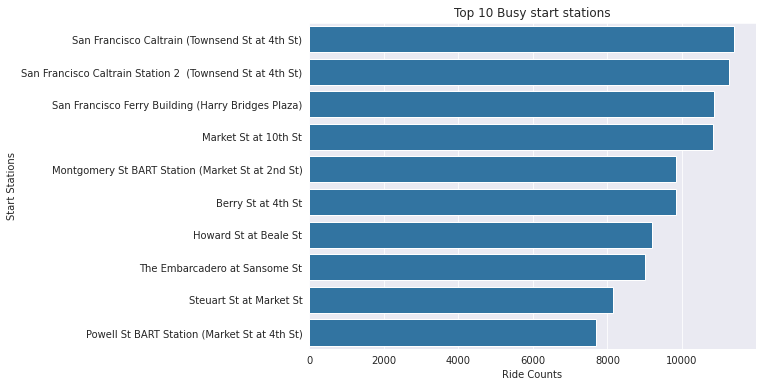

In [28]:
plt.figure(figsize=(8,6))

# Top 10 peak start stations
counts_start = df.start_station_name.value_counts().nlargest(10)

# slice top 10 data
station_start = df.loc[df.start_station_name.isin(counts_start.index)]

# plot the stations
sb.countplot(data = station_start, y = 'start_station_name', color = default_color, order = counts_start.index);
plt.title('Top 10 Busy start stations')
plt.xlabel('Ride Counts')
plt.ylabel('Start Stations');

* Most commuted start stations are **San Francisco Caltrain (Townsend St at 4th St), San Francisco Caltrain Station 2 (Townsend St at 4th St) and San Francisco Ferry Building (Harry Bridges Plaza)**

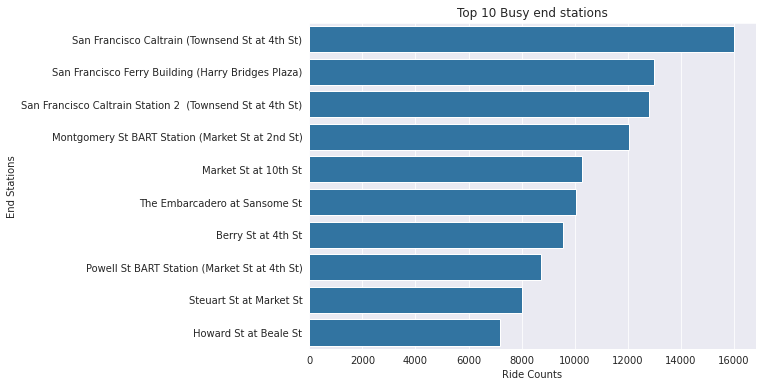

In [29]:
plt.figure(figsize=(8,6))

# Top 10 peak end stations
counts_end = df.end_station_name.value_counts().nlargest(10) 

# slice top 10 data
station_end = df.loc[df.end_station_name.isin(counts_end.index)]

# plot the stations
sb.countplot(data = station_end, y = 'end_station_name', color = default_color, order = counts_end.index)

# set title and label
plt.title('Top 10 Busy end stations')
plt.xlabel('Ride Counts')
plt.ylabel('End Stations');

* Most commuted end stations are **San Francisco Caltrain (Townsend St at 4th St), San Francisco Ferry Building (Harry Bridges Plaza) and San Francisco Caltrain Station 2 (Townsend St at 4th St)**

**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

* As per the univariate exploration, **higher rides are commuted during 8-9 AM and 4-6 PM** , **weekdays and October month**. **Riders who are subscribed, male gender and age range between 29-42 has did more number of rides**.
* Actual Ride duration has **long tail right skewed distribution**. For better undersatnding, **performed log scale transformation on duartion_sec**. From the scale distribution its evident that ride duration is **normaly distributed unimodel**.

**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

* Most of the data quality and tidiness issues were cleaned in the data cleaning phase.
* Distribution of riders age had unsual distributions which contains more number of outliers. As, we chose 2017 dataset, member age contains ages more than 100 which is exceptional. To avoid this, I have ignored the age range above 60.
* San Francisco Caltrain (Townsend St at 4th St) is the most commuted start station as well as the end station

# **Bivariate Exploration**

**Relationship between time characteristics and user type**

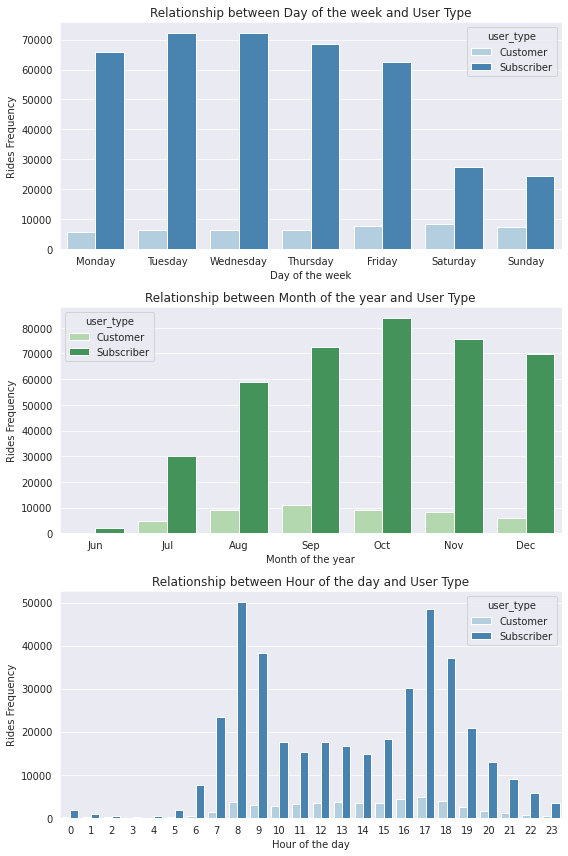

In [30]:
# set subplots
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

# plot the relationship
sb.countplot(data = df, x = 'start_day', hue = 'user_type', ax = ax[0], order = day_order, palette = 'Blues')
sb.countplot(data = df, x = 'start_month', hue = 'user_type', ax = ax[1], order = month_order, palette = 'Greens')
sb.countplot(data = df, x = 'start_hour', hue = 'user_type', ax = ax[2], order = hour_order, palette = 'Blues');

# title and labels
for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Day of the week and User Type')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Month of the year and User Type')
ax[2].set_xlabel('Hour of the day')
ax[2].set_title('Relationship between Hour of the day and User Type')

fig.tight_layout();

* Subscribed member riders are making more number of rides in weekdays.
* In winter season, subscribed member riders are making more number of rides.
* Subscribed member riders are making more number of rides during peak hours 8-9 AM and 4-6 PM.
* Casual customer riders counts are far less than subscribed riders

**Relationship between time characteristics and Rider Gender**

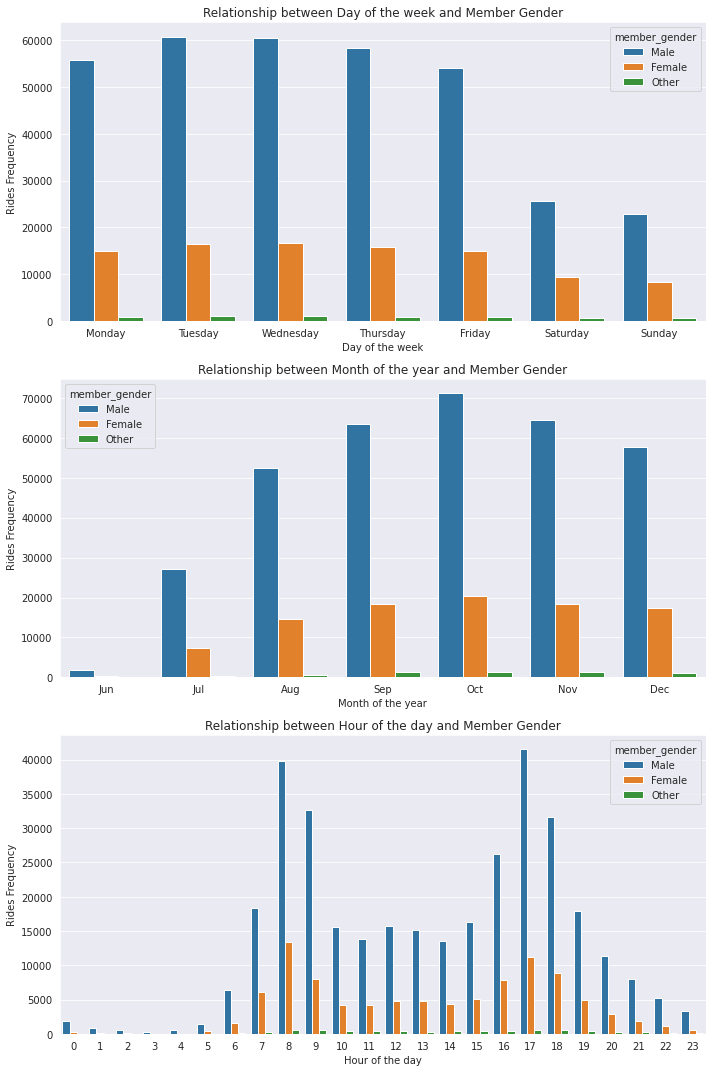

In [31]:
# set subplots
fig, ax = plt.subplots(nrows=3, figsize = [10,15])

# plot the relationship
sb.countplot(data = df, x = 'start_day', hue = 'member_gender', ax = ax[0], order = day_order)
sb.countplot(data = df, x = 'start_month', hue = 'member_gender', ax = ax[1], order = month_order)
sb.countplot(data = df, x = 'start_hour', hue = 'member_gender', ax = ax[2], order = hour_order);

# title and labels
for a in ax:
    a.set_ylabel('Rides Frequency')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Day of the week and Member Gender')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Month of the year and Member Gender')
ax[2].set_xlabel('Hour of the day')
ax[2].set_title('Relationship between Hour of the day and Member Gender')

fig.tight_layout();

* Number of rides are greater for Males and lower for Customer.
* Males are making more number of rides in weekdays rather than weekends.
* In winter season, Males are making more number of rides.
* Males are making more number of rides during peak hours 8-9 AM and 4-6 PM.

**Relationship between time characteristics and Rider Age**

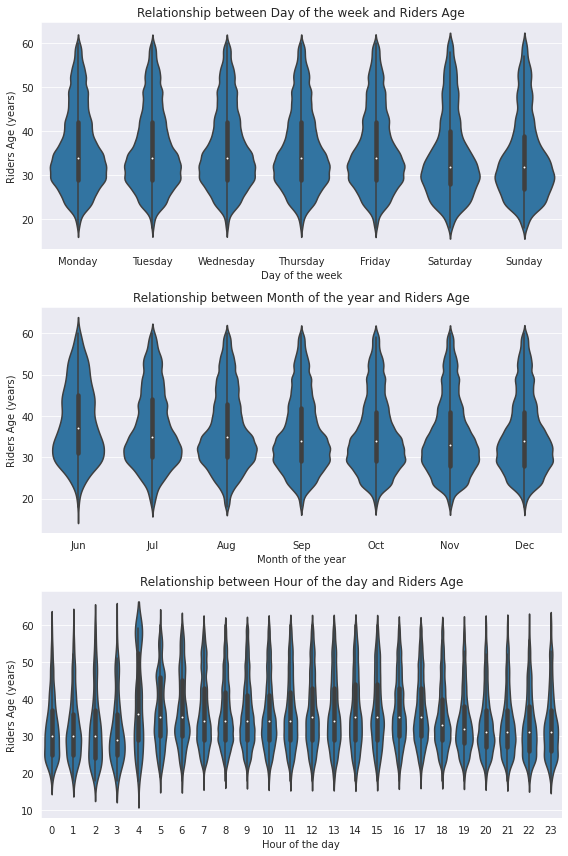

In [32]:
# set subplots
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

# plot relationship
sb.violinplot(data = df, x = 'start_day', y = 'member_age', ax = ax[0], order = day_order, color = default_color)
sb.violinplot(data = df, x = 'start_month', y = 'member_age', ax = ax[1], order = month_order, color = default_color)
sb.violinplot(data = df, x = 'start_hour', y = 'member_age', ax = ax[2], order = hour_order, color = default_color);

# title and labels
for a in ax:
    a.set_ylabel('Riders Age (years)')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Day of the week and Riders Age')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Month of the year and Riders Age')
ax[2].set_xlabel('Hour of the day')
ax[2].set_title('Relationship between Hour of the day and Riders Age')

fig.tight_layout();

* All age group riders are **uniformly** commuting during weekday, month of the year and hour of the day.

**Relationship between Ride duration and Rider characteristics**

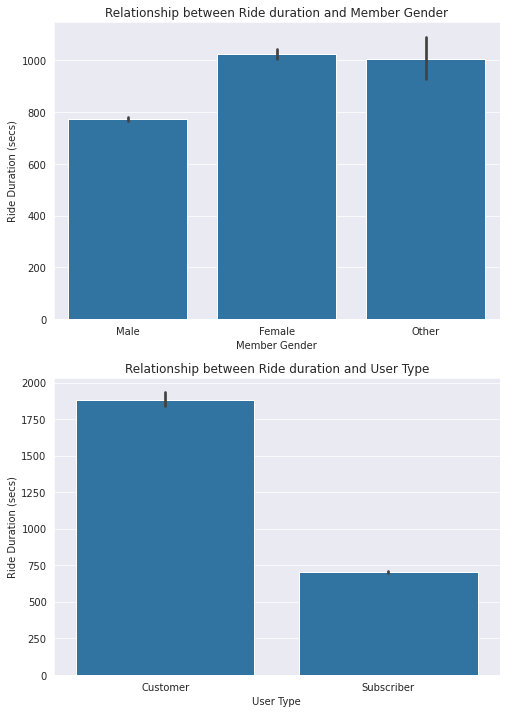

In [33]:
# set sunplots
fig, ax = plt.subplots(nrows=2, figsize = [8,12])

# plot relationship between Ride duration and Rider Member Gender,User Type 
sb.barplot(data = df, y = 'duration_sec', x = 'member_gender', ax = ax[0], color = default_color)
sb.barplot(data = df, y = 'duration_sec', x = 'user_type', ax = ax[1], color = default_color)

# title and labels
for a in ax:
    a.set_ylabel('Ride Duration (secs)')
    
ax[0].set_xlabel('Member Gender')
ax[0].set_title('Relationship between Ride duration and Member Gender')
ax[1].set_xlabel('User Type')
ax[1].set_title('Relationship between Ride duration and User Type');

* Comparing to ride frequency, ride duration is higher for **Females and Other** genders rather than **Males** and **Customers** rather than **Subscribers**

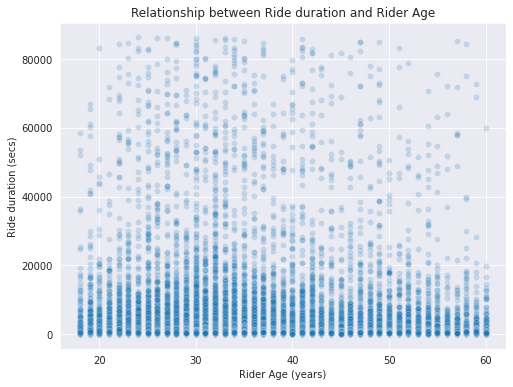

In [34]:
# set figure size
plt.figure(figsize=(8,6))

# plot relationship between Ride duration and Rider Age
sb.scatterplot(data = df, x='member_age', y = 'duration_sec', alpha=0.2);

# set title and labels
plt.title('Relationship between Ride duration and Rider Age')
plt.ylabel('Ride duration (secs)')
plt.xlabel('Rider Age (years)');

* Surprisingly all age group riders has uniformly distributed ride durations which means older riders are riding fast as well as the younger riders ranges approximately below 20k seconds

**Relationship between time characteristics and Ride Duration**

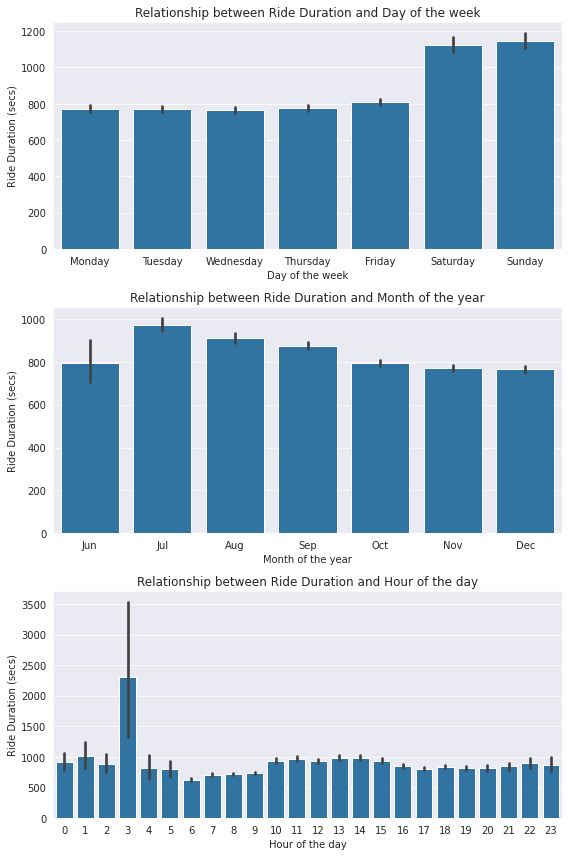

In [35]:
# set subplots
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

#plot relationship
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', ax = ax[0], order = day_order, color = default_color)
sb.barplot(data = df, x = 'start_month', y = 'duration_sec', ax = ax[1], order = month_order, color = default_color)
sb.barplot(data = df, x = 'start_hour', y = 'duration_sec', ax = ax[2], order = hour_order, color = default_color);

# title and labels
for a in ax:
    a.set_ylabel('Ride Duration (secs)')
    
ax[0].set_xlabel('Day of the week')
ax[0].set_title('Relationship between Ride Duration and Day of the week')
ax[1].set_xlabel('Month of the year')
ax[1].set_title('Relationship between Ride Duration and Month of the year')
ax[2].set_xlabel('Hour of the day')
ax[2].set_title('Relationship between Ride Duration and Hour of the day')

fig.tight_layout();

* Relationship between time characteristics and ride duartion is totally differs from Relationship between time characteristics and peak frequency rides.
* **Weekends rides are taking more ride duration over weekends**. July month and 3 AM has higher ride durations.

**Relationship between Start Station and Ride duration**

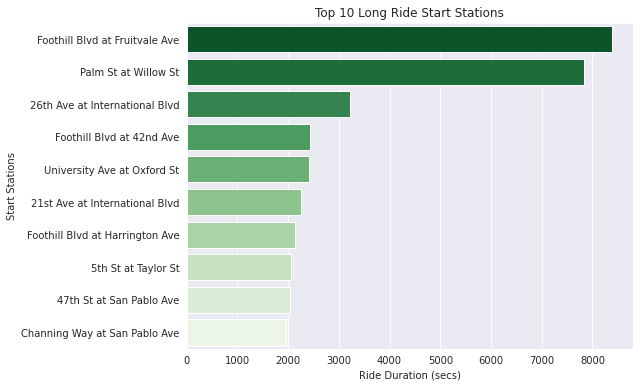

In [36]:
plt.figure(figsize=(8,6))

# find average ride duration for start station and select top 10 start stations
station_start  = df.groupby('start_station_name')[['duration_sec']].mean().reset_index()
station_start = station_start.sort_values(['duration_sec'], ascending = False).head(10)

# plot the relationship
sb.barplot(x= 'duration_sec', y ='start_station_name', data = station_start, palette = "Greens_r");

# set title and label
plt.title('Top 10 Long Ride Start Stations')
plt.xlabel('Ride Duration (secs)')
plt.ylabel('Start Stations');

* Long ride duration start stations are **Foothill Blvd at Fruitvale Ave** and **Palm St at Willow St**

**Relationship between End Station and Ride duration**

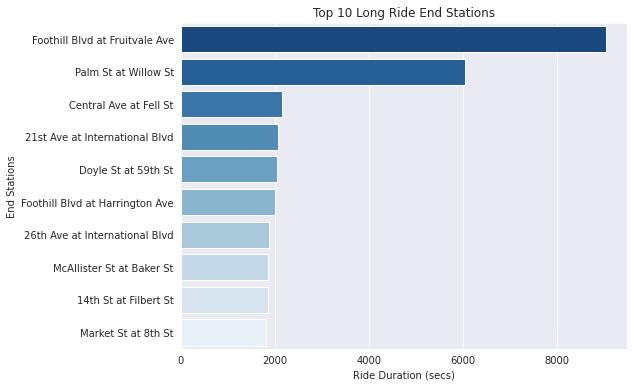

In [37]:
plt.figure(figsize=(8,6))

# find average ride duration for end station and select top 10 end stations
station_end  = df.groupby('end_station_name')[['duration_sec']].mean().reset_index()
station_end = station_end.sort_values(['duration_sec'], ascending = False).head(10)

# plot the relationship
sb.barplot(x= 'duration_sec', y ='end_station_name', data = station_end, palette = "Blues_r");

# set title and label
plt.title('Top 10 Long Ride End Stations')
plt.xlabel('Ride Duration (secs)')
plt.ylabel('End Stations');

* Long ride duration end stations are **Foothill Blvd at Fruitvale Ave** and **Palm St at Willow St**

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

**Ride Frequency:**
* **Peak times**(day: weekdays, month: Oct-Dec, hour: 8-9AM, 4-6PM)
* **Male riders** seems to commute the most during peak times.
* Most of the riders are **member subscribers** who commuted during peak times.
* All age group riders are **uniformly commuting** during peak times. There is no trend towards ride counts.

**Ride Duration**
* **Peak times**(day: weekends - month: Jul-Aug, hour: 3AM)
* **Female riders **are taking higher ride durations over Male and other genders.
* Similarly, **casual customer** are taking higher ride durations over member subscribers.
* All age group riders has **uniformly distributed** ride durations which means older riders are riding fast as well as the younger riders

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

* I expected the rider age would impact the ride duration and ride frequency as we have older age riders. But, I observerd that rider age doesn't impacted the ride duartion. But ride frequency fairly correlated with rider age.
* Foothill Blvd at Fruitvale Ave and Palm St at Willow St are the long trip duration start stations as well as end stations.

# **Multivariate Exploration**

**Relationship between time characteristics and Riders characteristics by ride Frequency**

In [38]:
# groupby Day, Gender and User Type by size 
day_gen_typ = df.groupby(['start_day', 'member_gender', 'user_type']).size().reset_index(name='count')
#pivot to rearrange the grouped data
day_gen_typ = day_gen_typ.pivot(index = 'start_day', columns = ['member_gender', 'user_type'], values = 'count')

# groupby Month, Gender and User Type by size 
mon_gen_typ = df.groupby(['start_month', 'member_gender', 'user_type']).size().reset_index(name='count')
#pivot to rearrange the grouped data
mon_gen_typ = mon_gen_typ.pivot(index = 'start_month', columns = ['member_gender', 'user_type'], values = 'count')

# groupby Hour, Gender and User Type by size 
hr_gen_typ = df.groupby(['start_hour', 'member_gender', 'user_type']).size().reset_index(name='count')
#pivot to rearrange the grouped data
hr_gen_typ = hr_gen_typ.pivot(index = 'start_hour', columns = ['member_gender', 'user_type'], values = 'count')

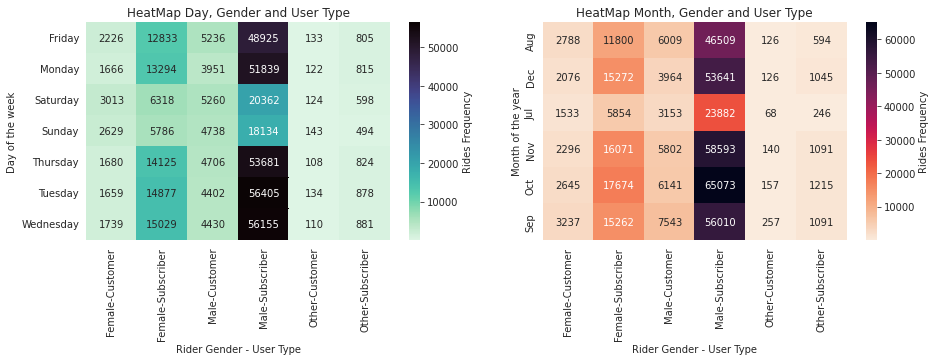

In [39]:
# set figure size
plt.figure(figsize=(15,4))

# plot heatmap Day, Gender and User Type
plt.subplot(1,2,1)
sb.heatmap(day_gen_typ.dropna(), annot = True, fmt = 'd', cmap = 'mako_r', cbar_kws={'label': 'Rides Frequency'})

# set title and label
plt.title('HeatMap Day, Gender and User Type')
plt.xlabel('Rider Gender - User Type')
plt.ylabel('Day of the week')

# plot heatmap Month, Gender and User Type
plt.subplot(1,2,2)
sb.heatmap(mon_gen_typ.dropna(), annot = True, fmt = '.0f', cmap = 'rocket_r', cbar_kws={'label': 'Rides Frequency'})

# set title and label
plt.title('HeatMap Month, Gender and User Type')
plt.xlabel('Rider Gender - User Type')
plt.ylabel('Month of the year');

* Subscribed Male riders are commuting more during weekdays(Tuesday & Wednesday: ~56k, Thursday: ~53k) whereas Other gender casual customers are commuting the least eternally.
* Subscribed Male riders are commuting more during October month(~65k).

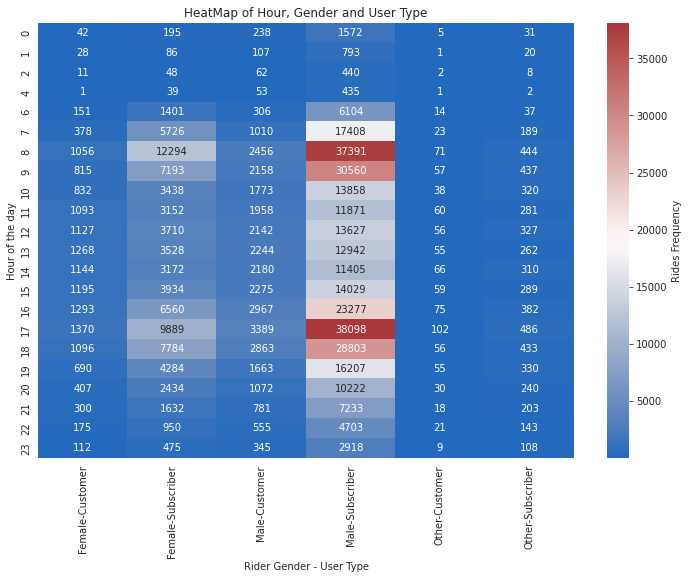

In [40]:
# set figure size
plt.figure(figsize=(12,8))

# plot heatmap Month, Gender and User Type
sb.heatmap(hr_gen_typ.dropna(), annot = True, fmt = '.0f', cmap = 'vlag', cbar_kws={'label': 'Rides Frequency'})

# set title and label
plt.title('HeatMap of Hour, Gender and User Type')
plt.xlabel('Rider Gender - User Type')
plt.ylabel('Hour of the day');

* Subscribed Male riders are commuting more during the peak hours 8-9 AM upto(~ 37k) and 4-6 PM upto(~ 38k).

**Relationship between time characteristics and Riders characteristics by Ride duration**

In [41]:
# groupby Day, Gender and User Type by avg duration 
day_ride = df.groupby(['start_day', 'member_gender', 'user_type']).mean().duration_sec.reset_index()

# groupby Month, Gender and User Type by avg duration 
month_ride = df.groupby(['start_month', 'member_gender', 'user_type']).mean().duration_sec.reset_index()

# groupby Hour, Gender and User Type by avg duration 
hour_ride = df.groupby(['start_hour', 'member_gender', 'user_type']).mean().duration_sec.reset_index()

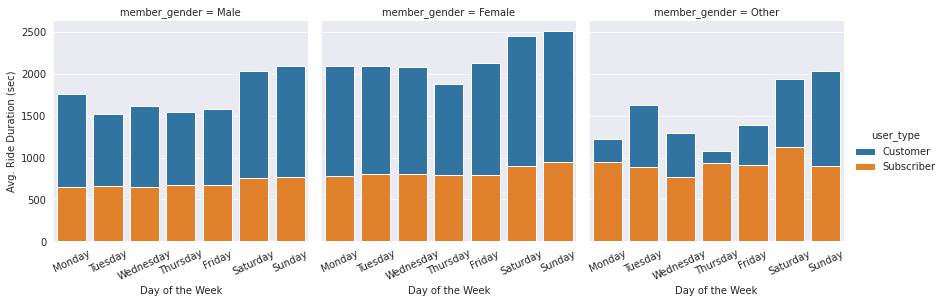

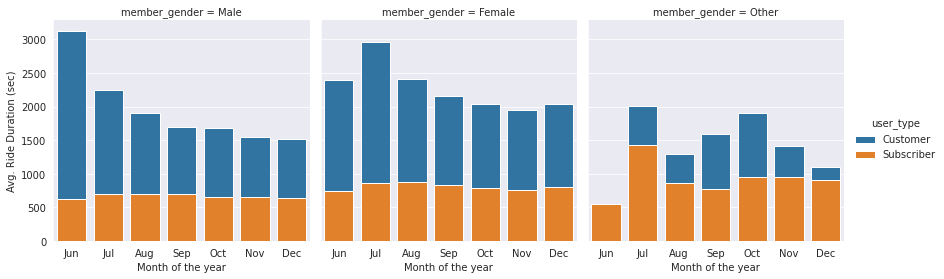

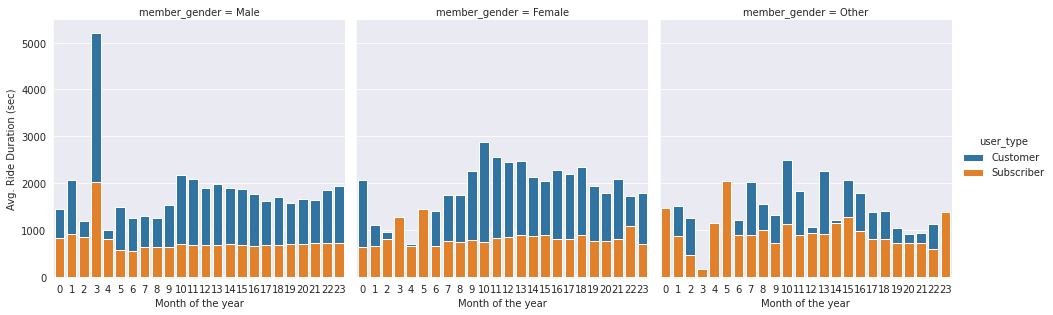

In [42]:
# plot the day_ride relationship using facegrid 
g = sb.FacetGrid(data=day_ride, col='member_gender', hue='user_type', col_order = ['Male','Female','Other'], height=4)
g.map(sb.barplot, 'start_day', 'duration_sec', order=day_order);

# set plot properties
g.set_xticklabels(day_order, rotation=25)
g.set_axis_labels("Day of the Week", "Avg. Ride Duration (sec)")
g.add_legend()

# plot the day_ride relationship using facegrid 
h = sb.FacetGrid(data=month_ride, col='member_gender', hue='user_type', col_order = ['Male','Female','Other'], height=4)
h.map(sb.barplot, 'start_month', 'duration_sec', order=month_order);

# set plot properties
h.set_xticklabels(month_order, rotation=0)
h.set_axis_labels("Month of the year", "Avg. Ride Duration (sec)")
h.add_legend()

# plot the day_ride relationship using facegrid 
i = sb.FacetGrid(data=hour_ride, col='member_gender', hue='user_type', col_order = ['Male','Female','Other'], height=4.5)
i.map(sb.barplot, 'start_hour', 'duration_sec', order=hour_order)

# set plot properties
i.set_xticklabels(hour_order, rotation=0);
i.set_axis_labels("Month of the year", "Avg. Ride Duration (sec)")
i.add_legend();

* Overall subscribed Female riders and casual Other gender riders are taking more ride duration who rides the most during ride duration with respect to ride duration. Males are taking higer ride duration at specific timeframe Jun month and 3AM.

**Relationship between Ride duartion and Member age**

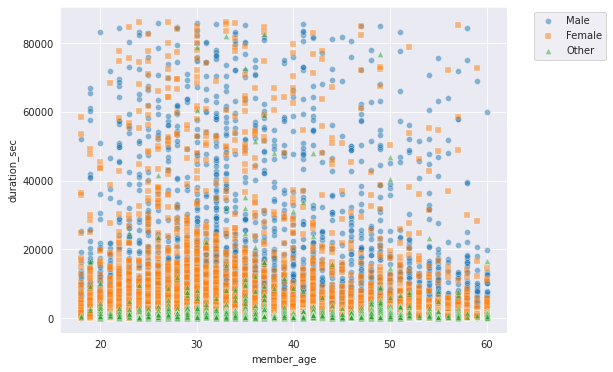

In [43]:
plt.figure(figsize=(8,6))

# set gender markers
gen_markers = [['Male', 'o'],
               ['Female', 's'],
               ['Other', '^']]

# plot the age and duration relationship with gender markers
for gen, marker in gen_markers:
    df_gen_sub = df[(df['member_gender'] == gen)]
    sb.scatterplot(data = df_gen_sub, x = 'member_age', y = 'duration_sec', marker = marker, alpha = 0.5)
    
# set plot properties    
plt.legend(['Male','Female','Other'], bbox_to_anchor = (1.05,1));

* Its evident that ride duration doesn't depends on the riders age. More or less both older and younger riders having alike trend towards ride duration. Meanwhile most of the female are taking long ride duarations

**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

> The multivariate exploration shows that, Subscribed Male riders are making more number of rides during the peak timeframes with respect to ride frequency. Its evident that bike ride frequency is totally depends on the riders characteristics Member gender, user type and member age. Whereas casual Customer Female riders are taking higher ride durations during the peak timeframes with respect to ride duration.



**Were there any interesting or surprising interactions between features?**

> Surprisingly, old age group riders are taking lower ride durations uniformly with younger age group riders for ride duration. Ride frequency and Ride duration has contradictory relationship towards bike riders characteristics. Relationship between time characteristics and ride duartion is totally differs from Relationship between time characteristics and peak frequency rides.